In [75]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
import warnings 
warnings.filterwarnings("ignore")

In [2]:
elect = pd.read_csv('ElectionData.csv')

In [3]:
elect

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0


In [4]:
elect.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

In [6]:
elect.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [7]:
elect['Party'].unique()

array(['PS', 'PPD/PSD', 'B.E.', 'CDS-PP', 'PCP-PEV', 'PAN', 'CH',
       'R.I.R.', 'PCTP/MRPP', 'A', 'L', 'IL', 'JPP', 'NC', 'PDR', 'PNR',
       'PURP', 'PPM', 'MPT', 'PTP', 'MAS'], dtype=object)

In [9]:
elect['territoryName'].unique()

array(['Território Nacional', 'Aveiro', 'Beja', 'Braga', 'Bragança',
       'Castelo Branco', 'Coimbra', 'Évora', 'Faro', 'Guarda', 'Leiria',
       'Lisboa', 'Madeira', 'Portalegre', 'Porto', 'Santarém', 'Setúbal',
       'Viana do Castelo', 'Vila Real', 'Viseu', 'Açores'], dtype=object)

In [11]:
elect['numParishes'].unique()

array([3092,  147,   75,  347,  226,  120,  155,   69,   67,  242,  110,
        134,   54,  243,  141,   55,  208,  197,  277,  156], dtype=int64)

In [14]:
elect['time'].unique()

array(['2019-10-06 20:10:02', '2019-10-06 20:15:02',
       '2019-10-06 20:20:02', '2019-10-06 20:25:02',
       '2019-10-06 20:30:02', '2019-10-06 20:35:02',
       '2019-10-06 20:40:02', '2019-10-06 20:45:02',
       '2019-10-06 20:50:01', '2019-10-06 20:55:01',
       '2019-10-06 21:00:01', '2019-10-06 21:05:01',
       '2019-10-06 21:10:01', '2019-10-06 21:15:02',
       '2019-10-06 21:20:02', '2019-10-06 21:25:02',
       '2019-10-06 21:30:01', '2019-10-06 21:35:01',
       '2019-10-06 21:40:02', '2019-10-06 21:45:02',
       '2019-10-06 21:50:01', '2019-10-06 21:55:01',
       '2019-10-06 22:00:02', '2019-10-06 22:05:02',
       '2019-10-06 22:10:01', '2019-10-06 22:15:01',
       '2019-10-06 22:20:02', '2019-10-06 22:25:01',
       '2019-10-06 22:30:01', '2019-10-06 22:35:01',
       '2019-10-06 22:40:02', '2019-10-06 22:45:01',
       '2019-10-06 22:50:01', '2019-10-06 22:55:02',
       '2019-10-06 23:00:01', '2019-10-06 23:05:01',
       '2019-10-06 23:10:02', '2019-10-06 23:1

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Party',data=elect,y='FinalMandates')
plt.show()

In [ ]:
elect.describe()

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x='Percentage',data=elect,y='FinalMandates')
plt.show()

Index(['time', 'territoryName', 'Party'], dtype='object')

In [17]:
elect["day"] = pd.to_datetime(elect.time,format='%Y-%m-%d %H:%M:%S').dt.day
elect["month"] = pd.to_datetime(elect.time,format='%Y-%m-%d %H:%M:%S').dt.month
elect["year"] = pd.to_datetime(elect.time,format='%Y-%m-%d %H:%M:%S').dt.year
elect["hour"] = pd.to_datetime(elect.time,format='%Y-%m-%d %H:%M:%S').dt.hour
elect["minute"] = pd.to_datetime(elect.time,format='%Y-%m-%d %H:%M:%S').dt.minute
elect["second"] = pd.to_datetime(elect.time,format='%Y-%m-%d %H:%M:%S').dt.second

In [18]:
elect

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,validVotesPercentage,Votes,Hondt,FinalMandates,day,month,year,hour,minute,second
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,40.22,147993,94,106,6,10,2019,20,10,2
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,34.95,128624,81,77,6,10,2019,20,10,2
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,7.15,26307,16,19,6,10,2019,20,10,2
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,5.14,18923,12,5,6,10,2019,20,10,2
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,4.83,17757,11,12,6,10,2019,20,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,0.20,332,0,0,7,10,2019,0,35,1
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,0.19,326,0,0,7,10,2019,0,35,1
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,0.15,256,0,0,7,10,2019,0,35,1
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,0.14,239,0,0,7,10,2019,0,35,1


In [19]:
elect['second'].unique()

array([2, 1], dtype=int64)

In [20]:
elect.drop('time',axis =1 ,inplace = True)

In [21]:
elect

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,...,validVotesPercentage,Votes,Hondt,FinalMandates,day,month,year,hour,minute,second
0,0,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,...,40.22,147993,94,106,6,10,2019,20,10,2
1,0,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,...,34.95,128624,81,77,6,10,2019,20,10,2
2,0,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,...,7.15,26307,16,19,6,10,2019,20,10,2
3,0,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,...,5.14,18923,12,5,6,10,2019,20,10,2
4,0,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,...,4.83,17757,11,12,6,10,2019,20,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,Viseu,8,0,277,277,4995,2.81,3700,2.08,...,0.20,332,0,0,7,10,2019,0,35,1
21639,265,Viseu,8,0,277,277,4995,2.81,3700,2.08,...,0.19,326,0,0,7,10,2019,0,35,1
21640,265,Viseu,8,0,277,277,4995,2.81,3700,2.08,...,0.15,256,0,0,7,10,2019,0,35,1
21641,265,Viseu,8,0,277,277,4995,2.81,3700,2.08,...,0.14,239,0,0,7,10,2019,0,35,1


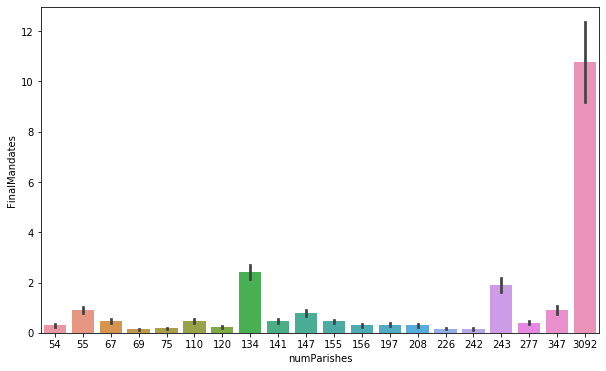

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(x='numParishes',y='FinalMandates',data = elect)
plt.show()

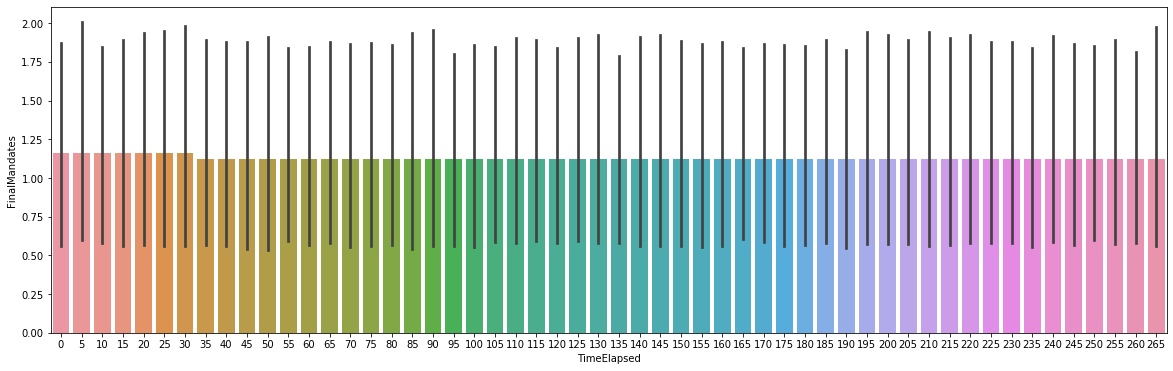

In [37]:
plt.figure(figsize=(20,6))
sns.barplot(x='TimeElapsed',y='FinalMandates',data = elect)
plt.show()

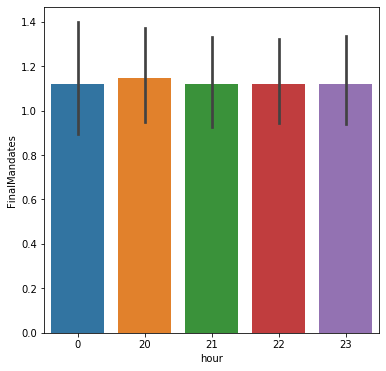

In [33]:
plt.figure(figsize=(6,6))
sns.barplot(x='hour',y='FinalMandates',data = elect)
plt.show()

In [26]:
elect['year'].unique()

array([2019], dtype=int64)

In [27]:
elect.drop('year',axis=1,inplace=True)

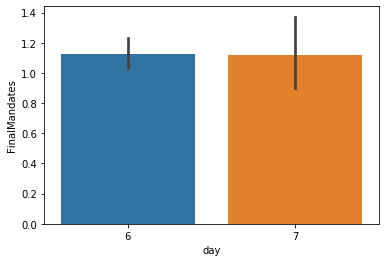

In [29]:
sns.barplot(x='day',y='FinalMandates',data = elect)

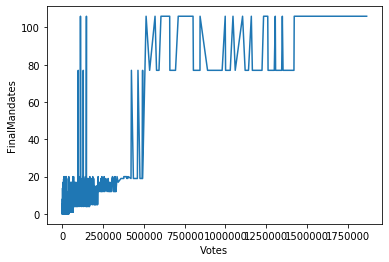

In [40]:
sns.lineplot(x='Votes',y='FinalMandates',data = elect)

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encode = ['territoryName','Party']
for i in encode:
    elect[i]=le.fit_transform(elect[i].astype(str))

In [49]:
elect

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,...,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,day,month,hour,minute,second
0,0,16,0,226,3092,1081,9652,2.50,8874,2.30,...,38.29,40.22,147993,94,106,6,10,20,10,2
1,0,16,0,226,3092,1081,9652,2.50,8874,2.30,...,33.28,34.95,128624,81,77,6,10,20,10,2
2,0,16,0,226,3092,1081,9652,2.50,8874,2.30,...,6.81,7.15,26307,16,19,6,10,20,10,2
3,0,16,0,226,3092,1081,9652,2.50,8874,2.30,...,4.90,5.14,18923,12,5,6,10,20,10,2
4,0,16,0,226,3092,1081,9652,2.50,8874,2.30,...,4.59,4.83,17757,11,12,6,10,20,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,19,8,0,277,277,4995,2.81,3700,2.08,...,0.19,0.20,332,0,0,7,10,0,35,1
21639,265,19,8,0,277,277,4995,2.81,3700,2.08,...,0.18,0.19,326,0,0,7,10,0,35,1
21640,265,19,8,0,277,277,4995,2.81,3700,2.08,...,0.14,0.15,256,0,0,7,10,0,35,1
21641,265,19,8,0,277,277,4995,2.81,3700,2.08,...,0.13,0.14,239,0,0,7,10,0,35,1


In [50]:
elect['day'].replace([7,6],[1,0],inplace=True)

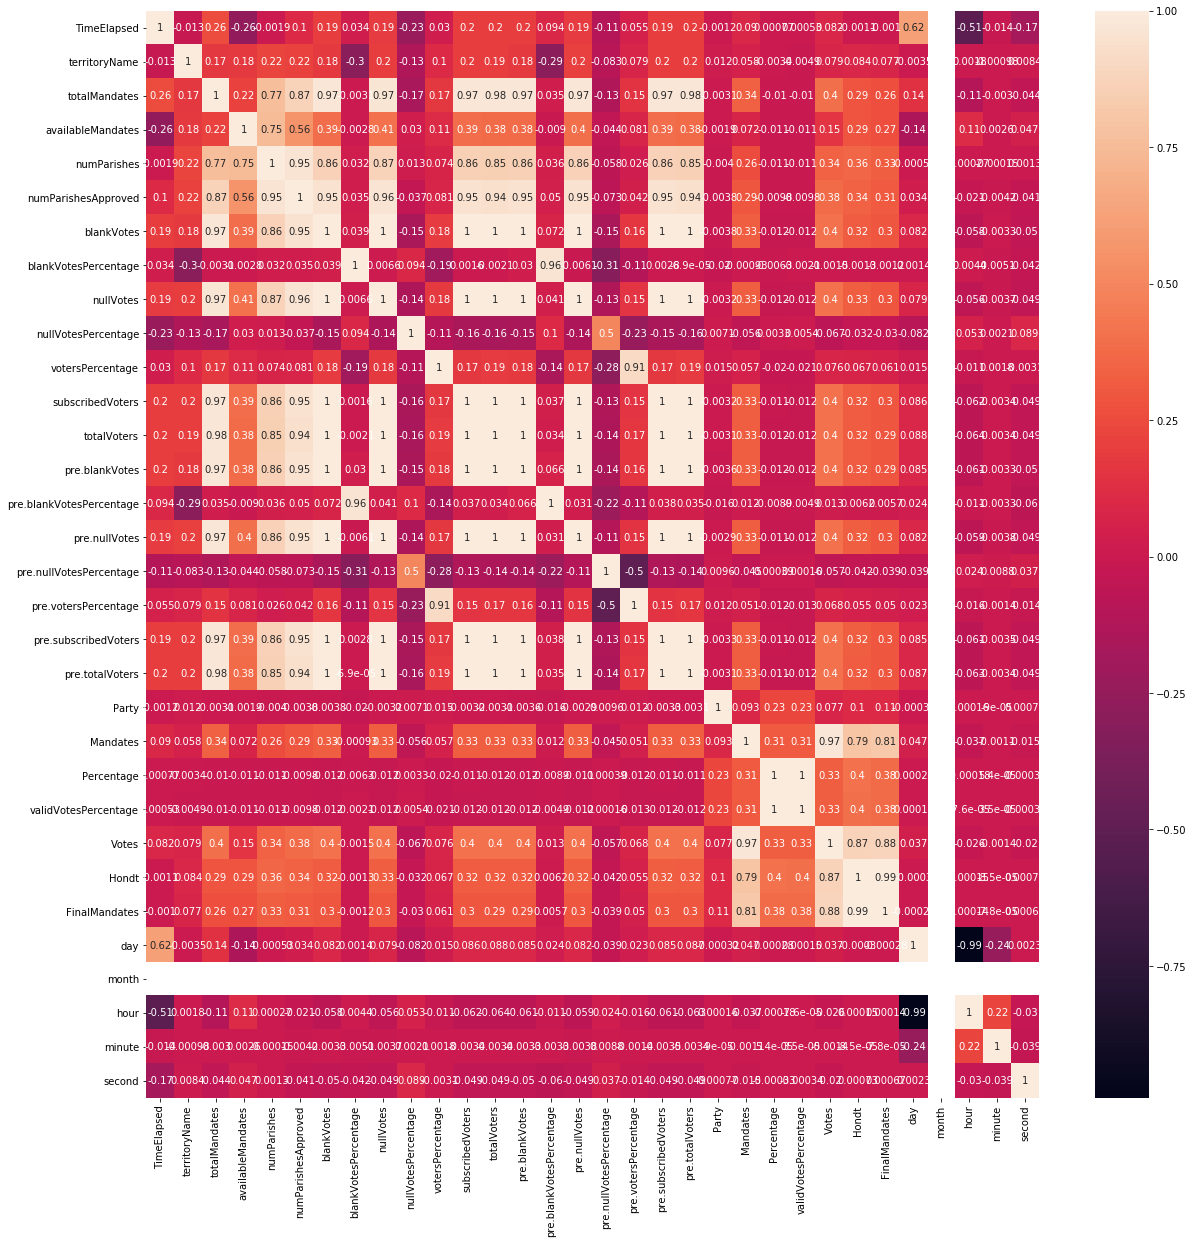

In [52]:
plt.figure(figsize=(20,20))
sns.heatmap(elect.corr(),annot = True)
plt.show()

In [46]:
elect.dtypes

TimeElapsed                   int64
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates                 int64
day                         

In [59]:
from scipy.stats import zscore
z = np.abs(zscore(elect))
z


array([[1.71470808, 0.98296816, 0.36868023, ..., 0.21149112, 1.01997108,
        1.00551351],
       [1.71470808, 0.98296816, 0.36868023, ..., 0.21149112, 1.01997108,
        1.00551351],
       [1.71470808, 0.98296816, 0.36868023, ..., 0.21149112, 1.01997108,
        1.00551351],
       ...,
       [1.69806785, 1.48421407, 0.11320217, ..., 2.36988852, 0.48395537,
        0.99451672],
       [1.69806785, 1.48421407, 0.11320217, ..., 2.36988852, 0.48395537,
        0.99451672],
       [1.69806785, 1.48421407, 0.11320217, ..., 2.36988852, 0.48395537,
        0.99451672]])

In [53]:
x = elect.drop('FinalMandates',axis=1)
df_x = elect.drop('FinalMandates',axis=1)
y = elect['FinalMandates'] 

In [54]:
x.shape

(21643, 31)

In [55]:
y.shape

(21643,)

In [60]:
x.skew()

TimeElapsed                 -0.005496
territoryName               -0.025884
totalMandates                5.150031
availableMandates            5.131572
numParishes                  3.920433
numParishesApproved          4.238343
blankVotes                   4.521940
blankVotesPercentage         0.069627
nullVotes                    4.520945
nullVotesPercentage          0.855419
votersPercentage            -1.158029
subscribedVoters             4.568797
totalVoters                  4.541364
pre.blankVotes               4.551489
pre.blankVotesPercentage     0.021609
pre.nullVotes                4.563235
pre.nullVotesPercentage      1.231109
pre.votersPercentage        -0.779289
pre.subscribedVoters         4.565085
pre.totalVoters              4.548030
Party                       -0.083536
Mandates                    16.576658
Percentage                   2.542328
validVotesPercentage         2.543122
Votes                       13.940573
Hondt                       11.489315
day         

In [61]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
x = pt.fit_transform(x)  
x = pd.DataFrame(x,columns=df_x.columns)
x

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,...,Mandates,Percentage,validVotesPercentage,Votes,Hondt,day,month,hour,minute,second
0,-2.111746,0.967098,-1.447187,2.019599,2.275851,1.917994,0.822172,-0.160780,1.026189,0.991136,...,-0.345244,1.767410,1.765174,2.014330,2.220224,-0.418374,0.0,0.035352,-0.967184,1.005514
1,-2.111746,0.967098,-1.447187,2.019599,2.275851,1.917994,0.822172,-0.160780,1.026189,0.991136,...,-0.345244,1.750873,1.748373,1.966419,2.220224,-0.418374,0.0,0.035352,-0.967184,1.005514
2,-2.111746,0.967098,-1.447187,2.019599,2.275851,1.917994,0.822172,-0.160780,1.026189,0.991136,...,-0.345244,1.355934,1.353522,1.395310,2.220089,-0.418374,0.0,0.035352,-0.967184,1.005514
3,-2.111746,0.967098,-1.447187,2.019599,2.275851,1.917994,0.822172,-0.160780,1.026189,0.991136,...,-0.345244,1.202944,1.201377,1.269785,2.219880,-0.418374,0.0,0.035352,-0.967184,1.005514
4,-2.111746,0.967098,-1.447187,2.019599,2.275851,1.917994,0.822172,-0.160780,1.026189,0.991136,...,-0.345244,1.168861,1.169256,1.245267,2.219768,-0.418374,0.0,0.035352,-0.967184,1.005514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,1.524773,1.391611,0.624817,-1.033315,0.877404,0.793401,0.375281,0.230117,0.383443,0.489065,...,-0.345244,-0.984011,-0.985059,-0.489473,-0.467605,2.390207,0.0,-2.319689,0.542852,-0.994517
21639,1.524773,1.391611,0.624817,-1.033315,0.877404,0.793401,0.375281,0.230117,0.383443,0.489065,...,-0.345244,-1.005720,-1.006125,-0.498394,-0.467605,2.390207,0.0,-2.319689,0.542852,-0.994517
21640,1.524773,1.391611,0.624817,-1.033315,0.877404,0.793401,0.375281,0.230117,0.383443,0.489065,...,-0.345244,-1.096153,-1.093811,-0.617504,-0.467605,2.390207,0.0,-2.319689,0.542852,-0.994517
21641,1.524773,1.391611,0.624817,-1.033315,0.877404,0.793401,0.375281,0.230117,0.383443,0.489065,...,-0.345244,-1.119705,-1.116631,-0.651660,-0.467605,2.390207,0.0,-2.319689,0.542852,-0.994517


In [62]:
x.skew()

TimeElapsed                -0.306219
territoryName              -0.240401
totalMandates               0.034522
availableMandates           0.201209
numParishes                 0.041984
numParishesApproved        -0.044717
blankVotes                  0.008504
blankVotesPercentage        0.167059
nullVotes                   0.002925
nullVotesPercentage         0.039701
votersPercentage           -0.033572
subscribedVoters            0.000000
totalVoters                 0.000000
pre.blankVotes              0.002763
pre.blankVotesPercentage    0.039802
pre.nullVotes               0.001755
pre.nullVotesPercentage     0.004264
pre.votersPercentage       -0.184101
pre.subscribedVoters        0.000000
pre.totalVoters             0.000000
Party                      -0.278235
Mandates                    2.551493
Percentage                  0.528421
validVotesPercentage        0.520429
Votes                       0.009152
Hondt                       1.675614
day                         1.971970
m

In [63]:
from sklearn.metrics import r2_score
lr =LinearRegression()
def maxr2_score(regr,x,y):
    max_r_score = 0 
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_score)
        if r2_scr>max_r_score:
            max_r_score = r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [64]:
r_state= maxr2_score(lr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  43 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  44 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  45 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  46 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  47 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  48 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  49 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  50 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  51 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  52 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  53 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  54 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
ls = Lasso()
parameters = {"alpha":[0.0001,0.001,0.01,0.1]}
clf= GridSearchCV(ls,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.0001}

In [66]:
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,20)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=5)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 1}

In [67]:
ls=Lasso(alpha=0.0001)
rg = Ridge(alpha=0.0001)
knr= KNeighborsRegressor(n_neighbors=1)

In [77]:
r_state= maxr2_score(ls,x,y)

r2 score corresponding to  42 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  43 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  44 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  45 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  46 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  47 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  48 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  49 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  50 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  51 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  52 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  53 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  54 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to

In [78]:
r_state= maxr2_score(knr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  43 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  44 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  45 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  46 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  47 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  48 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  49 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  50 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  51 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  52 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  53 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  54 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings 
warnings.filterwarnings("ignore")
gbr = GradientBoostingRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[50,100,150,200,250]}
clft = GridSearchCV(gbr,parameters,cv=5)
clft.fit(x,y)
clft.best_params_

{'learning_rate': 1, 'n_estimators': 100}

In [71]:
gbr = GradientBoostingRegressor(learning_rate=1,n_estimators=100) 
r_state= maxr2_score(gbr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  43 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  44 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  45 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  46 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  47 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  48 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  49 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  50 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  51 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  52 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  53 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  54 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to

In [72]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
ada = AdaBoostRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[50,100,150,200,250],"base_estimator":[lr,ls,dt]}
fd = GridSearchCV(ada,parameters,cv=5)
fd.fit(x,y)
fd.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 150}

In [74]:
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),learning_rate=1,n_estimators=150)
r_state = maxr2_score(ada,x,y)

r2 score corresponding to  42 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  43 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  44 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  45 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  46 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  47 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  48 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  49 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  50 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  51 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  52 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  53 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to  54 is <function r2_score at 0x00000192C617DA68>
r2 score corresponding to

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=43 ,test_size=0.33)
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),learning_rate=1,n_estimators=150)
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

In [82]:
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score:",r2_score(y_test,y_pred))

RMSE is: 0.0
r2 score: 1.0


In [83]:
from sklearn.externals import joblib
joblib.dump(ada,"Election Result.obj")

['Election Result.obj']

In [84]:
model = joblib.load('Election Result.obj')

In [85]:
model.predict(x_test)

array([0., 0., 0., ..., 0., 0., 0.])